
# Project: No-show appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Exploring no-show appointments in Brazil to find the effective features that would result on predicting if a patient will show up for their scheduled appointment 

>Exploring each feature trying to find underlying relations between features 
so we gonna some quistions like : Is there direct relation between features? , how many have missed the appointment ? , how many do have Scholarship?,how is the distribution of females to males ?

> **packing**: Firstly, I will import packages that I will use.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [4]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') # Load data into a data-frame
df.head() #getting overview of our data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.set_index('PatientId', inplace=True)
df.head() #set PatientId as an index

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#Checking the logic of our columns values
Columns = ['Gender','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']
for c in Columns:
    Uni = df[c].unique()
    print (c)
    print (Uni)
#Columns variable logic seems to be fine and finding that Handcap has range of 5 levels but,   
print('max_age: ' + str(df['Age'].max()))
print('min_age: ' + str(df['Age'].min()))
#there's a problem and an obvious one in minumum also in the maximum age after checking List of the verified,
#in Brazil (https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people) there's no way such a person with this age at 2016

Gender
['F' 'M']
Scholarship
[0 1]
Hipertension
[1 0]
Diabetes
[0 1]
Alcoholism
[0 1]
Handcap
[0 1 2 3 4]
SMS_received
[0 1]
No-show
['No' 'Yes']
max_age: 115
min_age: -1


<a id='wrangling'></a>
Columns variable logic seems to be fine and finding that Handcap has range of 5 levels but,there's a problem and an obvious one in minumum age also there's one in the maximum age after checking List of the verified,
in Brazil (https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people) there's no way such a person with this age at 2016

In [7]:
df.isnull().sum() #Checking for missing values

AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<a id='wrangling'></a>
there's no missing values

In [8]:
df.info() #Checking for our data-type in our columns and if it well matches 

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   AppointmentID   110527 non-null  int64 
 1   Gender          110527 non-null  object
 2   ScheduledDay    110527 non-null  object
 3   AppointmentDay  110527 non-null  object
 4   Age             110527 non-null  int64 
 5   Neighbourhood   110527 non-null  object
 6   Scholarship     110527 non-null  int64 
 7   Hipertension    110527 non-null  int64 
 8   Diabetes        110527 non-null  int64 
 9   Alcoholism      110527 non-null  int64 
 10  Handcap         110527 non-null  int64 
 11  SMS_received    110527 non-null  int64 
 12  No-show         110527 non-null  object
dtypes: int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
check = pd.DataFrame(df,columns=df.columns)
duplicate = check[check.duplicated(keep='last')]
duplicate

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,


<a id='wrangling'></a>
there's no duplicated rows

In [10]:
df.shape #shape reference

(110527, 13)

In [11]:
# firstly,we will deall with age
droping_max= df.index[df['Age'] == 115].tolist()
dropin_min = df.index[df['Age'] == -1].tolist()
droping = droping_max + dropin_min
df.drop(droping, axis=0,inplace = True)
# now, we are going to check for max and min age
print('max_age: ' + str(df['Age'].max()))
print('min_age: ' + str(df['Age'].min()))
# max_age seems fine but min_age still is not logical
droping = df.index[df['Age'] == 0].tolist()
df.drop(droping, axis=0,inplace = True)
# now, we are going to check for min age
print('min_age: ' + str(df['Age'].min()))
#seems to be fine now
df.shape

max_age: 102
min_age: 0
min_age: 1


(106900, 13)

we dropped ages that doesn't make sense 115 for max and (-1,0) for min

In [12]:
#change type of No-show to be able to plot it
df = df.replace(to_replace = ['Yes','No'],value = ['1','0'])
df['No-show'] = df['No-show'].astype(int)
df['No-show'].value_counts()

0    85235
1    21665
Name: No-show, dtype: int64

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) 
#Trying to get columns of waiting days
df['Waitng_Days'] = (df['ScheduledDay'] - df['AppointmentDay'])*-1
df['Waitng_Days'] = df['Waitng_Days'].dt.days+1
df[df.Waitng_Days < 0 ]

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waitng_Days
PatientId,,,,,,,,,,,,,,
7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,-1
7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-1
2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-1
9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-6
3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,-1


there's waiting days with negative numbers we need to drop it

In [14]:
df = df[df.Waitng_Days >= 0 ]

In [15]:
#dropping un-wanted columns for analysis
Columns = ['AppointmentID','ScheduledDay','AppointmentDay']
df.drop(Columns, axis=1,inplace = True)
df.head(1)   

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waitng_Days
PatientId,,,,,,,,,,,
2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0


In [27]:
df.shape

0    85235
1    21660
Name: No-show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q.1 : Is there direct relation between features?

In [17]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waitng_Days
Age,1.000000,-0.113236,0.502191,0.290719,0.090313,0.073362,0.005079,-0.067463,0.038939
Scholarship,-0.113236,1.000000,-0.024672,-0.027706,0.033477,-0.009826,-0.000069,0.029395,-0.030465
Hipertension,0.502191,-0.024672,1.000000,0.430780,0.085397,0.078413,-0.008931,-0.037274,-0.017029
Diabetes,0.290719,-0.027706,0.430780,1.000000,0.016831,0.056499,-0.016192,-0.015927,-0.027362
Alcoholism,0.090313,0.033477,0.085397,0.016831,1.000000,0.003899,-0.027445,-0.000511,-0.038974
Handcap,0.073362,-0.009826,0.078413,0.056499,0.003899,1.000000,-0.024978,-0.006931,-0.019936
SMS_received,0.005079,-0.000069,-0.008931,-0.016192,-0.027445,-0.024978,1.000000,0.127392,0.396298
No-show,-0.067463,0.029395,-0.037274,-0.015927,-0.000511,-0.006931,0.127392,1.000000,0.185726
Waitng_Days,0.038939,-0.030465,-0.017029,-0.027362,-0.038974,-0.019936,0.396298,0.185726,1.000000


<a id='eda'></a>
>It seems like there's no correlation between appointment and our features
**But** there's is a noticeable realtion between Age and Hipertension also between Diabetes and Hipertension lets **plot** these also there is a slight relation that the more you wait the more often you will receive an sms

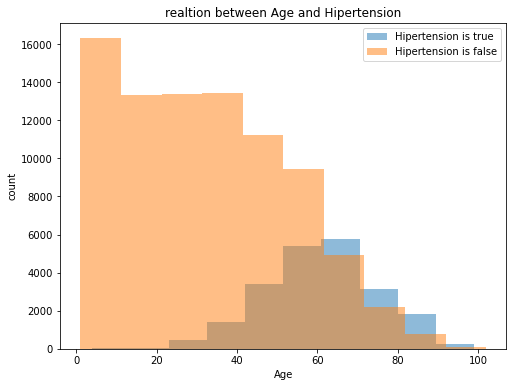

In [18]:
mask1 = df['Hipertension'] == 1
df_1 = df[mask1]
mask2 = df['Hipertension'] == 0
df_2 = df[mask2]
fig , ax = plt.subplots(figsize=(8,6))
ax.hist(df_1['Age'] , alpha = 0.5 , label = 'Hipertension is true')
ax.hist(df_2['Age'] , alpha = 0.5 , label = 'Hipertension is false')
ax.set_title('realtion between Age and Hipertension')
ax.set_xlabel('Age')
ax.set_ylabel('count')
ax.legend(loc='upper right')
plt.show()

<a id='eda'></a>
>It seems like Hipertension more often to appear in bigger ages 

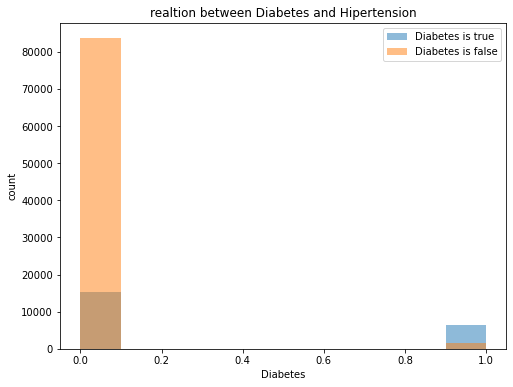

In [19]:
mask1 = df['Hipertension'] == 1
df_1 = df[mask1]
mask2 = df['Hipertension'] == 0
df_2 = df[mask2]
fig , ax = plt.subplots(figsize=(8,6))
ax.hist(df_1['Diabetes'] , alpha = 0.5 , label = 'Diabetes is true')
ax.hist(df_2['Diabetes'] , alpha = 0.5 , label = 'Diabetes is false')
ax.set_title('realtion between Diabetes and Hipertension')
ax.set_xlabel('Diabetes')
ax.set_ylabel('count')
ax.legend(loc='upper right')
plt.show()

<a id='eda'></a>
>It seems like Hipertension more often to occure in person that got Diabetes 

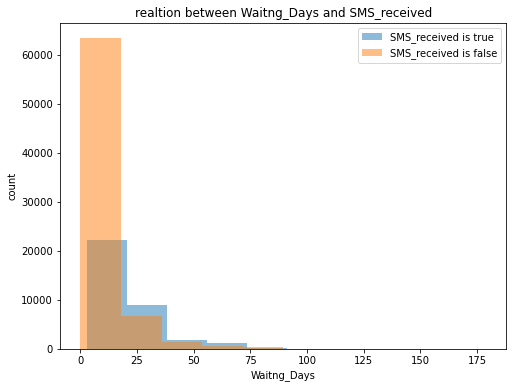

In [20]:
mask1 = df['SMS_received'] == 1
df_1 = df[mask1]
mask2 = df['SMS_received'] == 0
df_2 = df[mask2]
fig , ax = plt.subplots(figsize=(8,6))
ax.hist(df_1['Waitng_Days'] , alpha = 0.5 , label = 'SMS_received is true')
ax.hist(df_2['Waitng_Days'] , alpha = 0.5 , label = 'SMS_received is false')
ax.set_title('realtion between Waitng_Days and SMS_received')
ax.set_xlabel('Waitng_Days')
ax.set_ylabel('count')
ax.legend(loc='upper right')
plt.show()

### Q2 how many have missed??

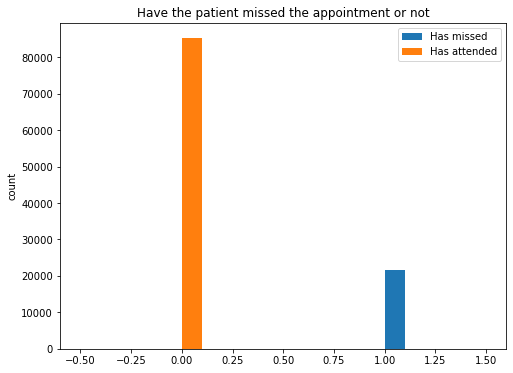

20.262874783666216

In [29]:
mask1 = df['No-show'] == 1
df_1 = df[mask1]
mask2 = df['No-show'] == 0
df_2 = df[mask2]
fig , ax = plt.subplots(figsize=(8,6))
ax.hist(df_1['No-show'] , label = 'Has missed')
ax.hist(df_2['No-show']  , label = 'Has attended')
ax.set_title('Have the patient missed the appointment or not')
ax.set_ylabel('count')
ax.legend(loc='upper right')
plt.show()
per = (len(df_1.index)/(len(df_1.index)+len(df_2.index)))*100 #percentage that patient has missed
per

<a id='eda'></a>
>It seems like 20% of the paitents has missed their appointment

### Q3 how many do have Scholarship??

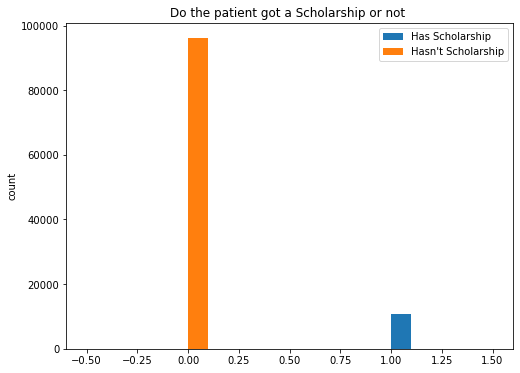

10.11179194536695

In [31]:
mask1 = df['Scholarship'] == 1
df_1 = df[mask1]
mask2 = df['Scholarship'] == 0
df_2 = df[mask2]
fig , ax = plt.subplots(figsize=(8,6))
ax.hist(df_1['Scholarship'] , label = 'Has Scholarship')
ax.hist(df_2['Scholarship']  , label = 'Hasn\'t Scholarship')
ax.set_title('Do the patient got a Scholarship or not ')
ax.set_ylabel('count')
ax.legend(loc='upper right')
plt.show()
per = (len(df_1.index)/(len(df_1.index)+len(df_2.index)))*100 #percentage that patient has missed
per

<a id='eda'></a>
>It seems like only 10% got a scholarship 

### Q4 how is the distribution of females to males?

percentage of femals to males: 65.5418868983582%


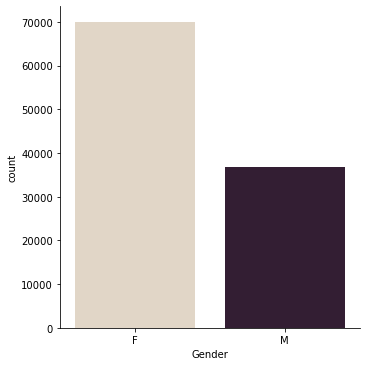

In [23]:
mask1 = df['Gender'] == 'F'
df_1 = df[mask1]
mask2 = df['Gender'] == 'M'
df_2 = df[mask2]
per = (len(df_1.index)/(len(df_1.index)+len(df_2.index)))*100
print('percentage of femals to males: ' + str(per) +'%')
sns.catplot(x="Gender", kind="count", palette="ch:.25", data=df)

<a id='eda'></a>
>It seems like 65% of patients are females

<a id='conclusions'></a>
## Conclusions
**Firstly, the limitations I have faced:** I couldn't address a proper prediction to find out probability that the patient is most likely gonna miss the appointment or not,with just visualizing and analysing tools but by using logistic regression or deep learning algorthim we could find a fair prediction
we also need more data to get more accurate correlation between Diabetes and Hipertension also maybe the person who has diabetes has hipertension and he doesn't know

1-Handcap has range of 5 levels

2-The correct maximum age is 102 years old

3-Maximum waiting days is 179 and minimum is hours

5- It seems like there's no correlation between appointment and our features
But there's is a noticeable realtion between Age and Hipertension represented as positive correlation 0.50 also between Diabetes and Hipertension 0.43 also there is a slight relation that the more you wait the more often you will receive an sms 0.39

6- percentage of missed appointments is: 80%

7- percentage of who got Schaolarship: 10% 

8- percentage of femals to males: 65%
